In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.



In [4]:
x_train = x_train[..., tf.newaxis] #adds a additional axis (60000,28,28) --> (60000,28,28,1)
x_test = x_test[..., tf.newaxis]
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
tf.random.normal(shape=x_train.shape)

<tf.Tensor: shape=(60000, 28, 28, 1), dtype=float32, numpy=
array([[[[-0.3112304 ],
         [-0.98404676],
         [ 0.08464271],
         ...,
         [-0.18005224],
         [ 0.07158177],
         [ 0.13498022]],

        [[ 1.5256594 ],
         [-0.07540909],
         [-1.1804303 ],
         ...,
         [ 2.404934  ],
         [-0.7222303 ],
         [-0.16939971]],

        [[ 0.405561  ],
         [-0.83484083],
         [ 0.48201337],
         ...,
         [ 2.2580998 ],
         [-1.9756451 ],
         [-0.5657157 ]],

        ...,

        [[-1.4218358 ],
         [ 0.12975305],
         [-2.2045238 ],
         ...,
         [-0.03325671],
         [-0.5790129 ],
         [-0.50519353]],

        [[-1.3992549 ],
         [-0.37009624],
         [ 0.38546216],
         ...,
         [ 1.2380507 ],
         [-1.1123564 ],
         [-0.19034141]],

        [[-0.19852707],
         [ 0.6769014 ],
         [ 1.1779059 ],
         ...,
         [ 0.71123874],
         [ 0.578

In [6]:
noise_factor = 0.2
x_train_noisy = x_train  +  noise_factor * tf.random.normal(shape=x_train.shape)
# noise factor multiplication result in increased spread in noise distribution
# result in 0.2^2 increase of variance, mean doesn't chnage (mean = 0)
x_test_noisy = x_test  +  noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

In [ ]:
x_test_noisy.shape

TensorShape([10000, 28, 28, 1])

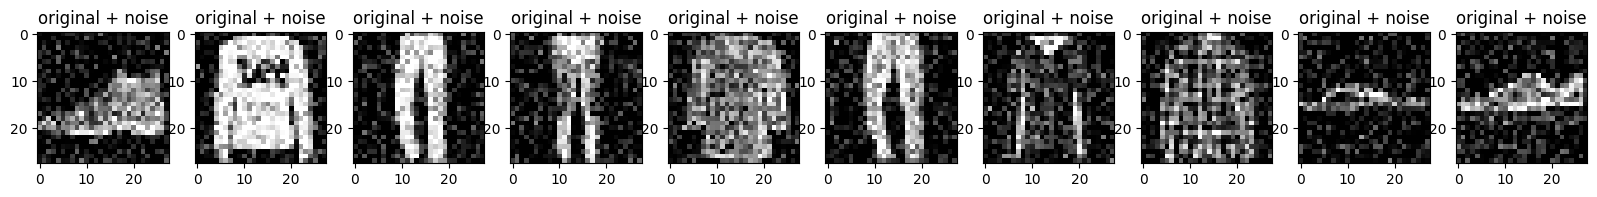

In [7]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [8]:
class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Input(shape=(28, 28, 1)),
          layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
          layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

        self.decoder = tf.keras.Sequential([
          layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [9]:
autoencoder = Denoise()

In [10]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [11]:
history = autoencoder.fit(x_train_noisy, x_train,
                          epochs=30,  # Train for 30 epochs
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 39ms/step - loss: 0.0358 - val_loss: 0.0108
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 35ms/step - loss: 0.0103 - val_loss: 0.0094
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 99s 44ms/step - loss: 0.0092 - val_loss: 0.0087
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 39ms/step - loss: 0.0086 - val_loss: 0.0084
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 39ms/step - loss: 0.0083 - val_loss: 0.0082
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 47ms/step - loss: 0.0082 - val_loss: 0.0081
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 125s 38ms/step - loss: 0.0080 - val_loss: 0.0080
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - loss: 0.0079 - val_loss: 0.0079
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 36ms/step - loss: 0.0079 - val_loss: 0.0078
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 33ms/step - loss: 0.0078 - val_loss: 0.0078
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 1

In [12]:
autoencoder.encoder.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 14, 14, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 7, 7, 8)             │           1,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,320 (5.16 KB)

 Trainable params: 1,320 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
autoencoder.decoder.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_transpose (Conv2DTranspose)   │ (32, 14, 14, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (32, 28, 28, 16)            │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 28, 28, 1)             │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,897 (7.41 KB)

 Trainable params: 1,897 (7.41 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

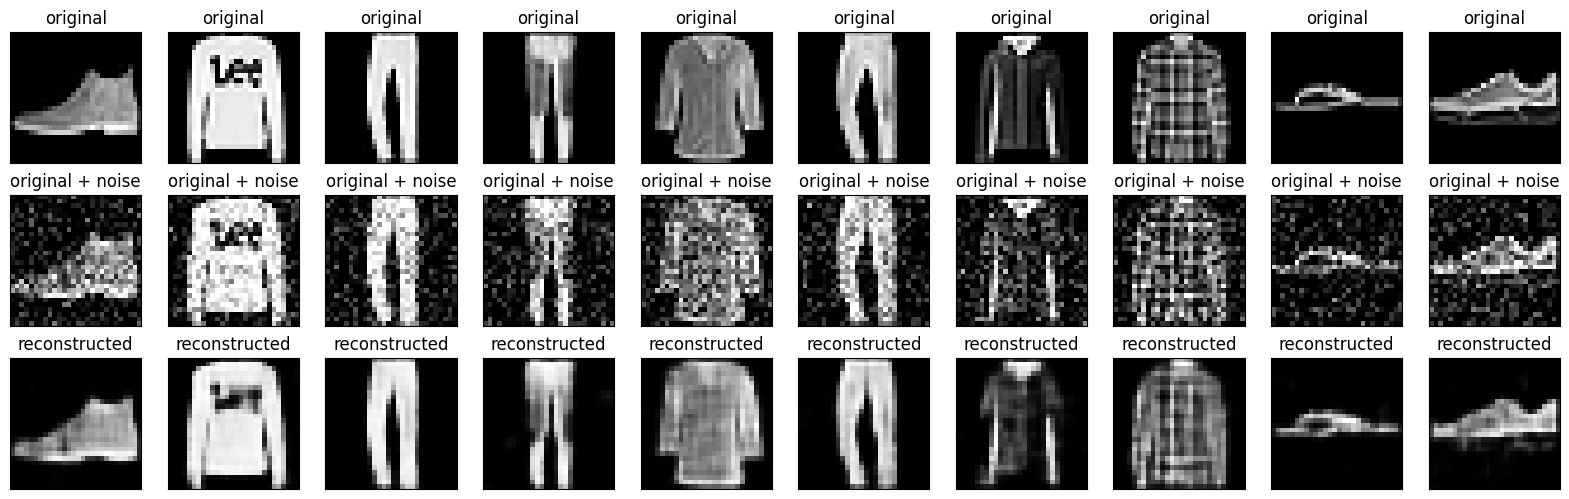

In [15]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display original + noise
    ax = plt.subplot(3, n, i + n + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(3, n, i + 2*n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

In [16]:
test_loss = autoencoder.evaluate(x_test_noisy, x_test)
print(f"Test Loss (MSE): {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0069
Test Loss (MSE): 0.006948818918317556


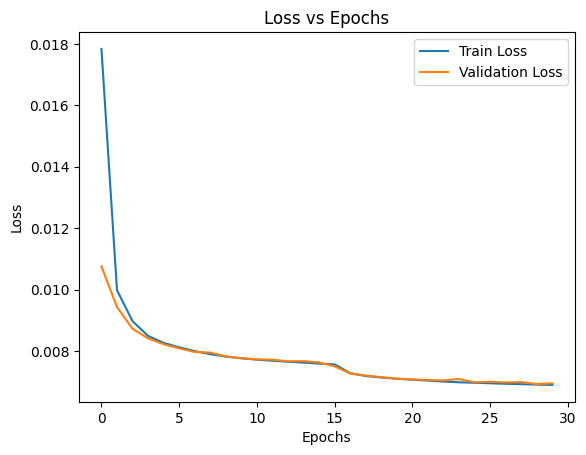

In [17]:
# Assuming the history object is available from the previous training run
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
noise_factors = [0.1, 0.2, 0.3]  # Experiment with different noise levels

for noise_factor in noise_factors:
    # Create noisy data with the current noise factor
    x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
    x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)


    # Clip noisy data to the image range (0, 1)
    x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
    x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)


    # Train the model with the current noisy data
    history = autoencoder.fit(x_train_noisy, x_train,
                              epochs=10,  # Adjust epochs as needed
                              shuffle=True,
                              validation_data=(x_test_noisy, x_test))

    # Evaluate and potentially plot loss for each noise factor (optional)
    test_loss = autoencoder.evaluate(x_test_noisy, x_test)
    print(f"Test Loss (MSE) for noise_factor {noise_factor}: {test_loss}")

    # Optionally plot reconstructed images
    # ... (code to display reconstructed images similar to previous code)

# Choose the best noise_factor based on your observations
# (e.g., consider a balance between noise level and reconstruction quality)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 34ms/step - loss: 0.0041 - val_loss: 0.0042
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 93s 40ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - loss: 0.0041 - val_loss: 0.0042
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 44ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 124s 34ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 93s 40ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 39ms/step - loss: 0.0041 - val_loss: 0.0041
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0041
Test Loss (MSE) for noise_factor 0.1: 0.0